## Research question
Our research question is “How does a song’s popularity spread over countries over time, and how much of that is attributed to the lyrics / word patterns in that song?”

## Why it is important to you, why it matters to others, and what is at stake
Music is something that everyone connects to, and our group wants to find a way to measure how and why music is spread across the world. It’s a way for musicians to figure out which kind of music allows them to connect with different audiences and cross cultural and linguistic barriers. It’s also a way for us as listeners to help determine what connects us to certain kinds of music, what word frequencies and thematic patterns matter most to us, and what cultural practices and norms cause certain groups to listen (or not to listen) to certain types of music. Essentially, it’s a way to determine what connects us all!

## A preliminary but definitive description of data sources that you will use
The first data source is from Spotify Charts. Spotify Charts is a website from the popular music streaming app, Spotify. Spofity constantly keeps ranking of how often songs are streamed from their uses, and keeps track of which songs are streamed the most. Spotify also separates these streaming counts by country. The top 200 songs of each day or week and their total streams are available to download in csv format from Spotify Charts. The data can be found at https://spotifycharts.com/. 

The second data source will be song lyrics. These can be found on genius.com, and we will be copying and pasting the text lyrics from those websites to perform text analysis. https://genius.com/

## Scope
For our project, we plan on having line charts charting a songs popularity by country over time (by plotting number of streams vs time). We plan on looking at multiple countries in comparison, so our hope is to have many countries together on the same chart. 

We also plan on seeing if there are geographical relations between songs popularity in certain countries, so something such as a map with the song's number of streams overlaid over the country, and each chart representing a different period in time would be interesting too. 

Lastly, we plan on doing text analysis on the lyrics versus the popularity in a certain country, so we may have frequency charts of words found in the song, as well as potentially some graphic showing sentiment analysis for the song lyric text. 

## Conclusion
Overall, by utilizing the data sources provided by Spotify Charts and Genius to create easy to read visualizations, we hope to find patterns in song popularity across different countries and look into whether certain lyrics are correlated with popularity within the top few songs. We also hope to find out how streaming of certain songs compare across different countries and whether or not the same songs trend at the same rate. 


In [1]:
import pandas as pd
import os
import glob
import datetime

path = os.getcwd()
path = os.path.join(path, "Data", "*.csv")
csv_files = glob.glob(path)
# loop over the list of csv files
weekly_global_charts = pd.DataFrame()

for f in csv_files:
    
    filename = os.path.basename(f)
    # read the csv file
    df = pd.read_csv(f)
      

    date_time_obj = datetime.datetime.strptime(filename[23:-4], '%Y-%m-%d')

    df["date"] = date_time_obj
    
    weekly_global_charts= weekly_global_charts.append(df)


In [2]:
weekly_global_charts.head()
len(weekly_global_charts)

2600

In [3]:
heat_waves = weekly_global_charts.loc[lambda df: df["track_name"] == "Heat Waves"]
heat_waves.head()


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
2,3,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,3,10,54,28387947,2022-01-06
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,2,57,30110762,2022-01-27
1,2,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,2,4,56,29386724,2022-01-20
6,7,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,3,6,51,26030908,2021-12-16
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,59,31668100,2022-02-10


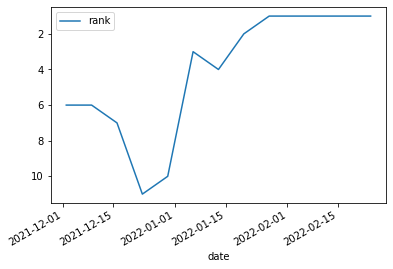

In [4]:
heat_waves.plot(x='date', y='rank').invert_yaxis()

### Step 3: Introduction to Data

- This can include summary information about the data, summary statistics where appropriate, and an identification of where there may be missing/incorrect/outlier data
- It should include at least 4 exploratory data visualizations
- This section does not need to be polished but it should be a good foundation

Here is a preliminary look at the data we are examining.

In [5]:
weekly_global_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,3,26,32295565,2022-01-06
1,2,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,4,8,31638858,2022-01-06
2,3,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,3,10,54,28387947,2022-01-06
3,4,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,4,11,21,27672367,2022-01-06
4,5,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,Columbia,1,7,12,27307694,2022-01-06


We can see from this that there are a couple of fields that our data encompasses: 
- rank
- uri
- arist name(s)
- track name
- source
- peak rank
- previous rank
- weeks on chart
- streams
- date

I want to take a quick look at fields that we could explore further. The first would be how many days were sampled for this dataset. 

In [10]:
weekly_global_charts['date'].unique()

array(['2022-01-06T00:00:00.000000000', '2022-01-27T00:00:00.000000000',
       '2022-01-20T00:00:00.000000000', '2021-12-16T00:00:00.000000000',
       '2022-02-10T00:00:00.000000000', '2021-12-09T00:00:00.000000000',
       '2022-02-24T00:00:00.000000000', '2022-01-13T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2021-12-23T00:00:00.000000000', '2021-12-30T00:00:00.000000000',
       '2022-02-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
len(weekly_global_charts['date'].unique())

13

I also did some summary statistics.

In [37]:
# For each day, print average weeks on chart, average streams, and other summary statistics

days = weekly_global_charts['date'].unique()

for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_global_charts.loc[weekly_global_charts['date'] == i]
    print("Date: ", i)
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    print("Average number of weeks on chart: ", avg_week_on_charts)
    print("Maximum number of weeks on chart: ", max_week_on_charts)
    print("Average number of steams: ", avg_streams)
    print("Most common peak ranking ", peak_ranking)
    print("")

Date:  2022-01-06T00:00:00.000000000
Average number of weeks on chart:  39.06
Maximum number of weeks on chart:  258
Average number of steams:  8425331.155
Most common peak ranking  0    1
dtype: int64

Date:  2022-01-27T00:00:00.000000000
Average number of weeks on chart:  38.48
Maximum number of weeks on chart:  261
Average number of steams:  8725903.94
Most common peak ranking  0    1
dtype: int64

Date:  2022-01-20T00:00:00.000000000
Average number of weeks on chart:  37.085
Maximum number of weeks on chart:  260
Average number of steams:  8755764.325
Most common peak ranking  0    1
dtype: int64

Date:  2021-12-16T00:00:00.000000000
Average number of weeks on chart:  31.215
Maximum number of weeks on chart:  255
Average number of steams:  10118092.99
Most common peak ranking  0    1
dtype: int64

Date:  2022-02-10T00:00:00.000000000
Average number of weeks on chart:  36.72
Maximum number of weeks on chart:  263
Average number of steams:  8919361.325
Most common peak ranking  0    

Then I looked at the streams for the number 1 song each week and plotted it. 

In [21]:
number1 = weekly_global_charts.loc[weekly_global_charts['rank'] == 1]

In [22]:
number1

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,3,26,32295565,2022-01-06
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,2,57,30110762,2022-01-27
0,1,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,1,10,31419176,2022-01-20
0,1,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,3,5,34440025,2021-12-16
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,59,31668100,2022-02-10
0,1,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,Columbia,1,1,8,34694378,2021-12-09
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,61,30702064,2022-02-24
0,1,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,2,9,32267898,2022-01-13
0,1,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,Columbia,1,1,7,42352529,2021-12-02
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,58,31100119,2022-02-03


<AxesSubplot:xlabel='date'>

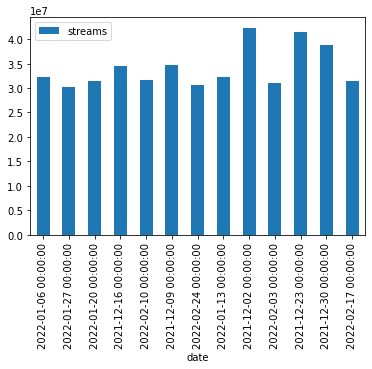

In [25]:
number1.plot(kind='bar', x='date', y='streams')

This shows the number of streams for the number one song of each of these days.

I wanted to also plot the current rank compared with the previous rank on one day (Feb 17th 2022)

In [38]:
peakprev = weekly_global_charts.loc[weekly_global_charts['date'] == "2022-02-17T00:00:00.000000000"]

In [39]:
peakprev

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,60,31455156,2022-02-17
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,3,32,27193990,2022-02-17
2,3,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,2,14,26765150,2022-02-17
3,4,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,16,25725045,2022-02-17
4,5,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,4,5,27,23556022,2022-02-17
...,...,...,...,...,...,...,...,...,...,...
195,196,spotify:track:4u7EnebtmKWzUH433cf5Qv,Queen,Bohemian Rhapsody - Remastered 2011,Hollywood Records,11,-1,177,5508788,2022-02-17
196,197,spotify:track:35wvL50xvKpCHEJPxLOLPI,Bad Bunny,Si Estuviésemos Juntos,Rimas Entertainment LLC,197,-1,1,5496274,2022-02-17
197,198,spotify:track:1J14CdDAvBTE1AJYUOwl6C,Duncan Laurence,Arcade,"Universal Music, a division of Universal Inter...",23,185,56,5488431,2022-02-17
198,199,spotify:track:2J2Z1SkXYghSajLibnQHOa,Sia,Unstoppable,Monkey Puzzle Records/RCA Records,199,-1,1,5482876,2022-02-17


I want to fill out the ones that have -1 as a ranking, which means they probably weren't on the ranking before.

In [43]:
peakprevfilt = peakprev.loc[peakprev['previous_rank'] != -1]
peakprevfilt

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,60,31455156,2022-02-17
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,3,32,27193990,2022-02-17
2,3,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,2,14,26765150,2022-02-17
3,4,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,16,25725045,2022-02-17
4,5,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,4,5,27,23556022,2022-02-17
...,...,...,...,...,...,...,...,...,...,...
188,189,spotify:track:7H0ya83CMmgFcOhw0UB6ow,Beach House,Space Song,Sub Pop Records,174,183,5,5572622,2022-02-17
189,190,spotify:track:7iHHlCbsFou5DZSW5HCPfs,"Boza, Lunay, Lenny Tavárez, Juhn, Beéle",Ella - Remix,Sony Music Latin,178,186,5,5563264,2022-02-17
190,191,spotify:track:6v3KW9xbzN5yKLt9YKDYA2,"Shawn Mendes, Camila Cabello",Señorita,Island Records,1,195,133,5559557,2022-02-17
193,194,spotify:track:4pt5fDVTg5GhEvEtlz9dKk,Måneskin,I WANNA BE YOUR SLAVE,RCA Records Label,8,174,39,5549171,2022-02-17


<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

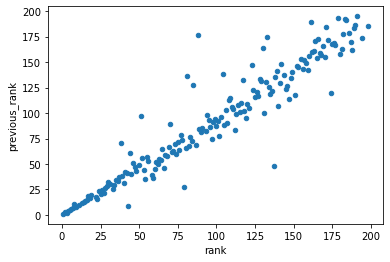

In [44]:
peakprevfilt.plot(kind='scatter', x='rank', y='previous_rank')

This shows that a lot of the rankings are similar to the previous day (which is why it seems to be following the x=y line), with some exceptions of jumps up and jumps down (above and below that line).

One the same day (Feb 17th 2022) I also want to compare the ranking with the number of streams.

<AxesSubplot:xlabel='rank'>

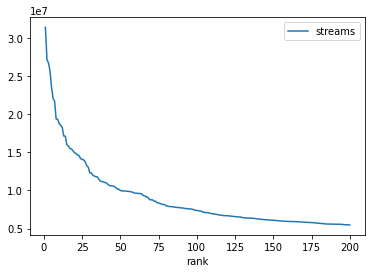

In [45]:
peakprev.plot(kind="line", x="rank", y="streams")

This follows what I had thought, that as the ranking goes up the number of streams goes down.

For my last visualization, I wanted to compare the ranking of a song with the number of weeks on the chart. I'll use the same day (Feb 17th 2022). 

<AxesSubplot:xlabel='rank'>

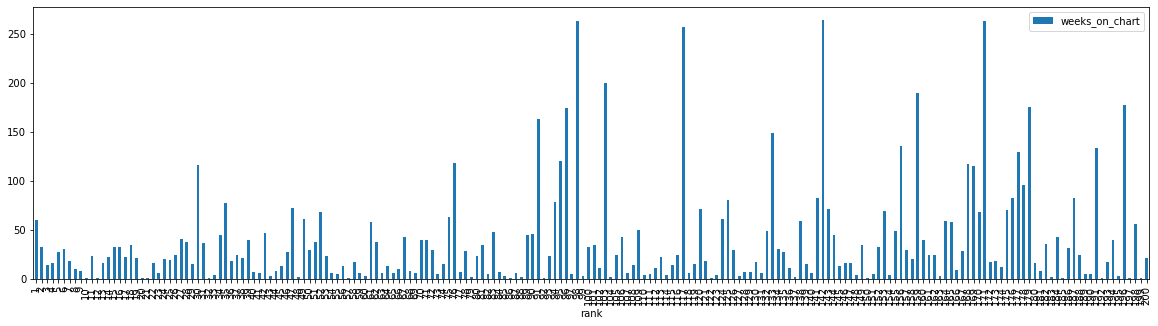

In [48]:
peakprev.plot(kind="bar", x="rank", y="weeks_on_chart", figsize=(20,5))

This analysis was interesting, but it makes sense. Songs that are higher up are more "new", and as they lose popularity they increase ranking while increasing the number of weeks they are on the charts. 